In [1]:
import numpy as np
import xarray as xr

The test dataset contains four cloud detection categories:

| category           | count | relative |
| ------------------ | ----- | -------- |
| unknown            |     4 | 28.6%    |
| cloud_free         |     2 | 14.3%    |
| probably_cloudy    |     3 | 21.4%    |
| most_likely_cloudy |     5 | 35.7%    |

Note that the relative counts don't correspond to cloud fractions as the undefined values should not be taken into account for the computation of cloud fractions.

The true cloud fractions are:
* `probably_cloudy`: 30%
* `most_likely_cloudy`: 50%
* total (any of the two): 80%

In [2]:
ds = xr.open_dataset("test_cloud_flag_nofill.nc")
ds

<xarray.Dataset>
Dimensions:     (time: 14)
Dimensions without coordinates: time
Data variables:
    cloud_flag  (time) int16 ...
Attributes:
    title:        Testfile for cloud_flags without _FillValue
    history:      created by /Users/tobi/Documents/MPIM/eurec4a/to_fill_or_no...
    Conventions:  CF-1.7

In this case, the datatype of `cloud_flag` gets decoded to an `int16` as in the original dataset.

# Mean cloudiness
This one is obviously wrong as the flag is not intended to be used as a numeric value:

In [3]:
float(ds.cloud_flag.mean())

0.6428571428571429

Let's have a look at the `flag_meanings`:

In [4]:
meanings = dict(zip(ds.cloud_flag.flag_meanings.split(), ds.cloud_flag.flag_values))
meanings

{'unknown': -1, 'cloud_free': 0, 'probably_cloudy': 1, 'most_likely_cloudy': 2}

Let's check what we get if we calculate the cloud fraction by the mean of all most_likely_cloudy pixels:

In [5]:
float((ds.cloud_flag == meanings['most_likely_cloudy']).mean())

0.35714285714285715

That's also not correct.

Let's compute it directly:

In [6]:
n_mlc = (ds.cloud_flag == meanings['most_likely_cloudy']).sum()
total = sum((ds.cloud_flag == meanings[m]).sum() for m in ['cloud_free', 'probably_cloudy', 'most_likely_cloudy'])
float(n_mlc / total)

0.5

Ok, this works :-)
Is it simpler by filtering out unknown values?

In [7]:
float((ds.cloud_flag[ds.cloud_flag != meanings['unknown']] == meanings['most_likely_cloudy']).mean())

0.5

Yep, this works as well an is considerably shorter.

# how does the data look without thinking about it?

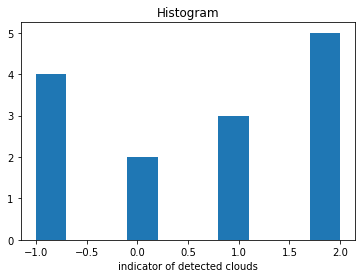

In [8]:
ds.cloud_flag.plot.hist();